In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
import numpy as np

/tmp/ipykernel_218487/108275805.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


/tmp/ipykernel_218487/2369314323.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(inputfile, header=0, index_col=0, squeeze=True)


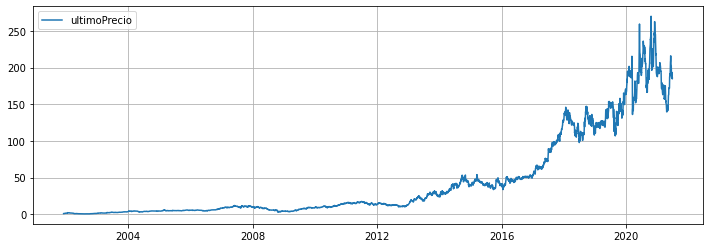

In [18]:
inputfile = "../Datasets/TECO2.2000.2021.csv"


ts = pd.read_csv(inputfile, header=0, index_col=0, squeeze=True)
ts.fechaHora = pd.to_datetime(ts.fechaHora)
ts.fechaHora=pd.to_datetime(ts.fechaHora).dt.date
ts.fechaHora=pd.DatetimeIndex(ts.fechaHora)
ts=ts.sort_index(ascending=False)

plt.figure(figsize=(12,4))
plt.plot(ts.fechaHora, ts.ultimoPrecio)
plt.legend(["ultimoPrecio"])
plt.grid()
plt.show()

In [8]:
adfuller(ts.ultimoPrecio)

(0.57890231841091,
 0.9870838971395222,
 32,
 4807,
 {'1%': -3.431711097447145,
  '5%': -2.862141452575749,
  '10%': -2.5670901548483767},
 21589.378085800738)

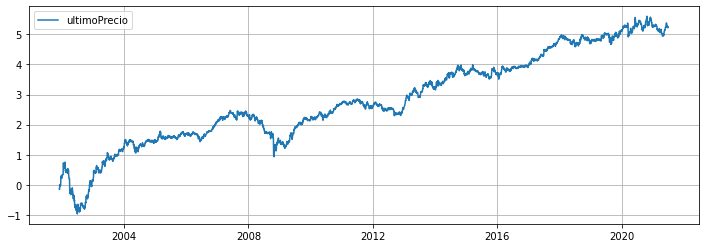

In [19]:
log_ultimoPrecio = np.log(ts.ultimoPrecio)
plt.figure(figsize=(12,4))
plt.plot(ts.fechaHora, log_ultimoPrecio)
plt.legend(["ultimoPrecio"])
plt.grid()
plt.show()

In [12]:
adfuller(log_ultimoPrecio, regression='ct')

(-3.037699968528972,
 0.1218440464079108,
 2,
 4837,
 {'1%': -3.9606428515465306,
  '5%': -3.4113980566548285,
  '10%': -3.127584714163724},
 -20319.196773954405)

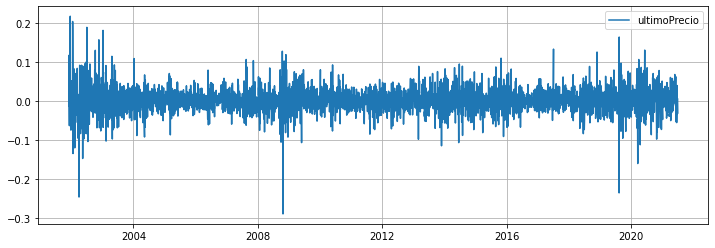

In [20]:
diff_log_ultimoPrecio = log_ultimoPrecio - log_ultimoPrecio.shift(1)
plt.figure(figsize=(12,4))
plt.plot(ts.fechaHora, diff_log_ultimoPrecio)
plt.legend(["ultimoPrecio"])
plt.grid()
plt.show()

In [17]:
adfuller(diff_log_ultimoPrecio.dropna())

(-46.783753322231384,
 0.0,
 1,
 4837,
 {'1%': -3.4317026511738518,
  '5%': -2.862137721117907,
  '10%': -2.567088168437432},
 -20357.65641243886)